# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-03-26 00:21:22--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-03-26 00:21:22--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [ ]:
# Mostrar las primeras filas
data.head()

# Informacion general
data.info()

# Verificar si hay datos nulos
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

<Axes: xlabel='Country'>

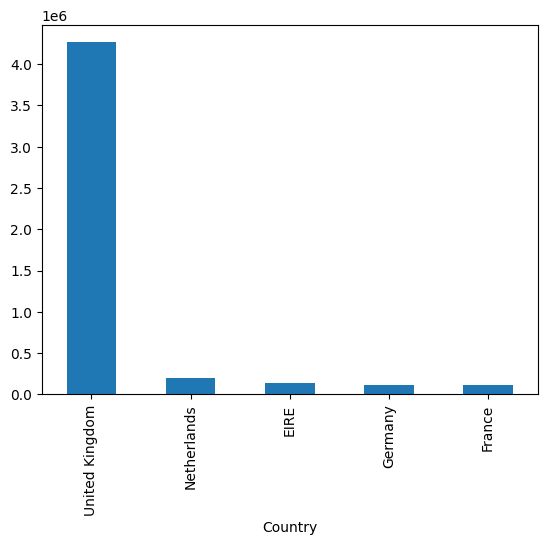

In [4]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head().plot(kind='bar')


In [5]:
# Agrupar los datos por la columna "Country"
grouped_data = data.groupby('Country')

# Calcular el total de "Quantity" vendido por país
total_quantity_by_country = grouped_data['Quantity'].sum()

# Calcular la media de "UnitPrice" por país
mean_unit_price_by_country = grouped_data['UnitPrice'].mean()

# Mostrar el total de "Quantity" por país
print("Total de Quantity por país:")
print(total_quantity_by_country.head())

# Mostrar la media de "UnitPrice" por país
print("\nMedia de UnitPrice por país:")
print(mean_unit_price_by_country.head())



Total de Quantity por país:
Country
Australia    83653
Austria       4827
Bahrain        260
Belgium      23152
Brazil         356
Name: Quantity, dtype: int64

Media de UnitPrice por país:
Country
Australia    3.220612
Austria      4.243192
Bahrain      4.556316
Belgium      3.644335
Brazil       4.456250
Name: UnitPrice, dtype: float64


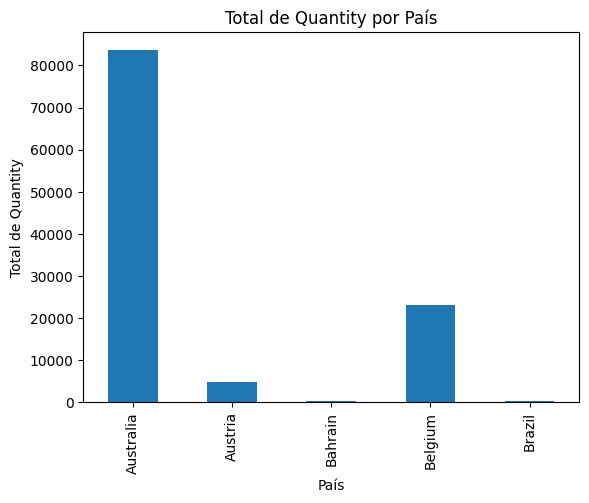

In [ ]:
# Visualizar el total de Quantity por país utilizando un gráfico de barras. Dame los 5 primeros
total_quantity_by_country.head().plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Total de Quantity')
plt.title('Total de Quantity por País')
plt.show()


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [ ]:
# Agrupar el DataFrame por "StockCode" y cuenta la frecuencia de cada producto
grouped_data = data.groupby('StockCode')

# Contar la frecuencia de cada producto
stock_code_counts = grouped_data['StockCode'].value_counts()

# Mostrar los StockCode más frecuentes
print("StockCode más frecuentes:")
print(stock_code_counts.head(10))




StockCode más frecuentes:
StockCode
10002      73
10080      24
10120      30
10123C      4
10123G      1
10124A      5
10124G      4
10125      94
10133     200
10134       1
Name: count, dtype: int64


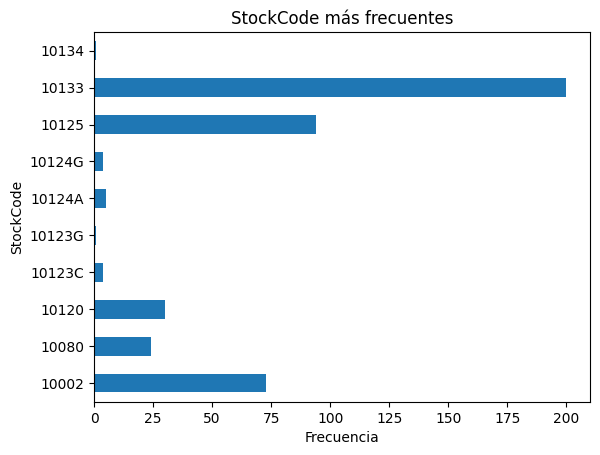

In [ ]:
# Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros
stock_code_counts.head(10).plot(kind='barh')
plt.xlabel('Frecuencia')
plt.ylabel('StockCode')
plt.title('StockCode más frecuentes')
plt.show()


## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [ ]:
# Crear nueva columna "TotalPrice" que sea el producto de "Quantity" y "UnitPrice"
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Agrupar los datos por "InvoiceNo" y calcular la suma de "TotalPrice" para cada factura
grouped_data = data.groupby('InvoiceNo')
total_price_per_invoice = grouped_data['TotalPrice'].sum()

# Calcula la factura promedio "media" del total de ventas por factura
average_total_price = total_price_per_invoice.mean()

# Mostrar la factura promedio
print("Factura promedio del total de ventas por factura:")
print(average_total_price)


Factura promedio del total de ventas por factura:
376.3609240926641


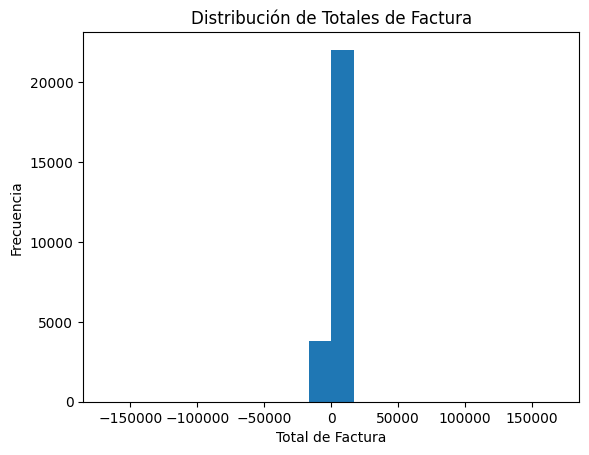

In [ ]:
# Visualiza la distribución de los totales de factura con un histograma.
plt.hist(total_price_per_invoice, bins=20)
plt.xlabel('Total de Factura')
plt.ylabel('Frecuencia')
plt.title('Distribución de Totales de Factura')
plt.show()


## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

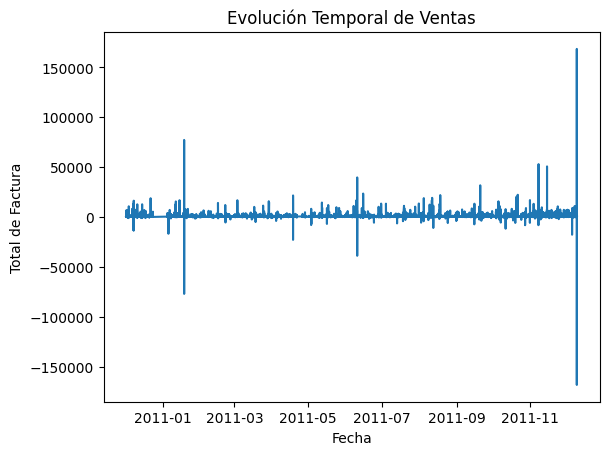

In [ ]:
# Columna "invoiceDate" para ver como evoluciona el valor de "TotalPrice" a lo largo del tiempo
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

total_price_per_invoice = data.groupby('InvoiceDate')['TotalPrice'].sum()

plt.plot(total_price_per_invoice.index, total_price_per_invoice.values)
plt.xlabel('Fecha')
plt.ylabel('Total de Factura')
plt.title('Evolución Temporal de Ventas')
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

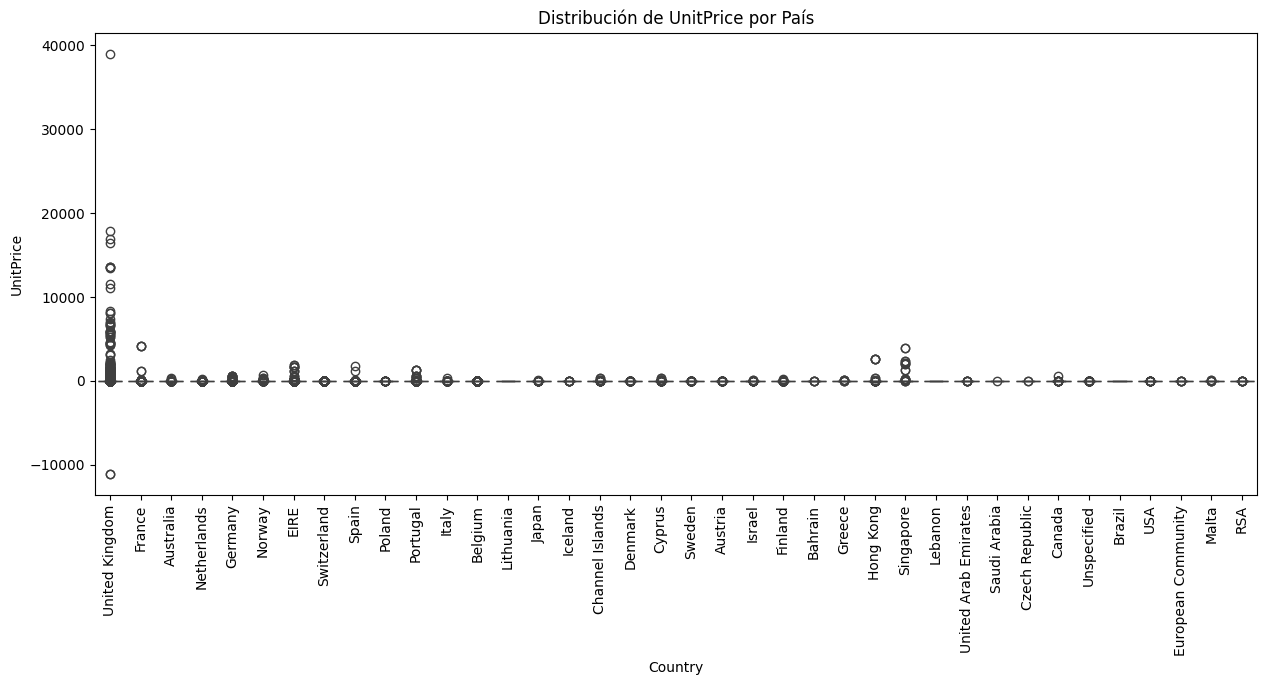

In [6]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.xticks(rotation=90)
plt.title('Distribución de UnitPrice por País')
plt.show()



## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

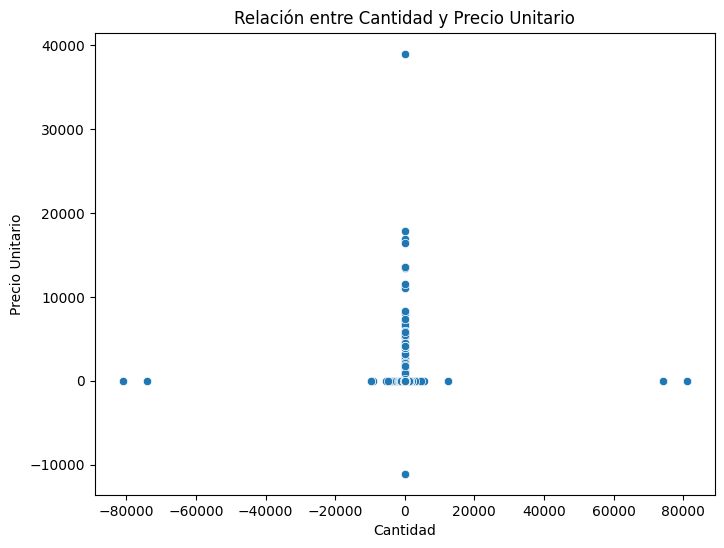

In [7]:
# Realiza un scatter plot para analizar la relación entre "Quantity" y "UnitPrice".
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=data)
plt.xlabel('Cantidad')
plt.ylabel('Precio Unitario')
plt.title('Relación entre Cantidad y Precio Unitario')
plt.show()



## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

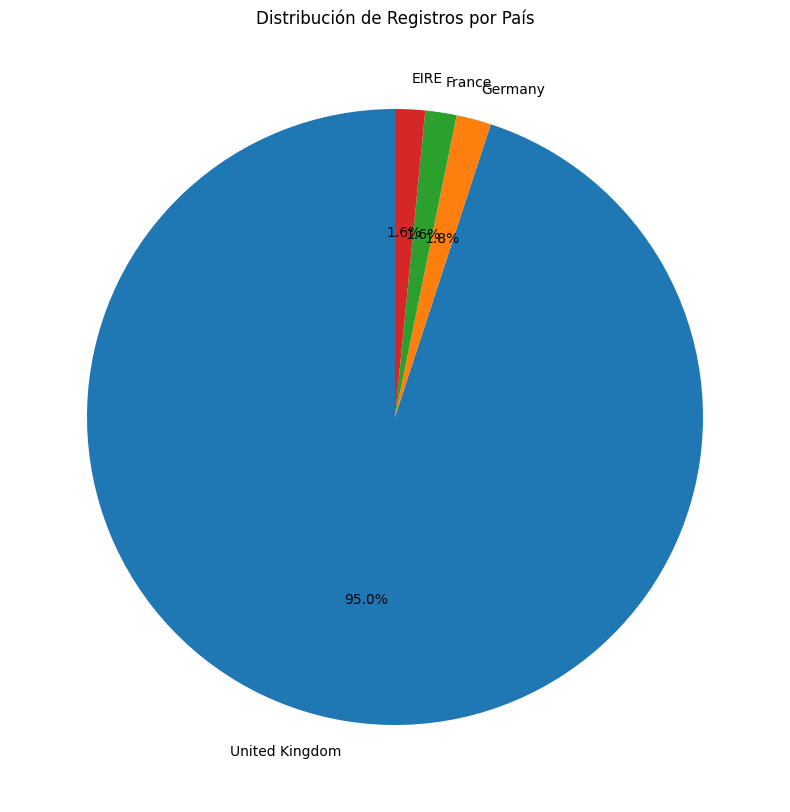

In [8]:
# Columna "Country" crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)
country_counts = data['Country'].value_counts(normalize=True)

country_counts = country_counts[country_counts > 0.01] # Esto quita los que sean menos del 1%


plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Registros por País')
plt.show()



## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

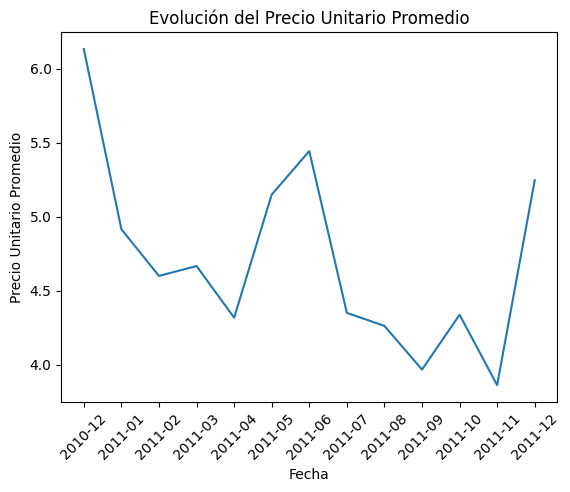

In [ ]:
# Agrupa los datos por la fecha (utilizando la columna InvoiceDate) para calcular el precio unitario promedio diario.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
average_unit_price_per_day = data.groupby('YearMonth')['UnitPrice'].mean()

# Gráfico de líneas. (hagalo mensual )
plt.plot(average_unit_price_per_day.index.astype(str), average_unit_price_per_day
         )
plt.xlabel('Fecha')
plt.ylabel('Precio Unitario Promedio')
plt.title('Evolución del Precio Unitario Promedio')
plt.xticks(rotation=45)
plt.show()


## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

<Axes: xlabel='Description'>

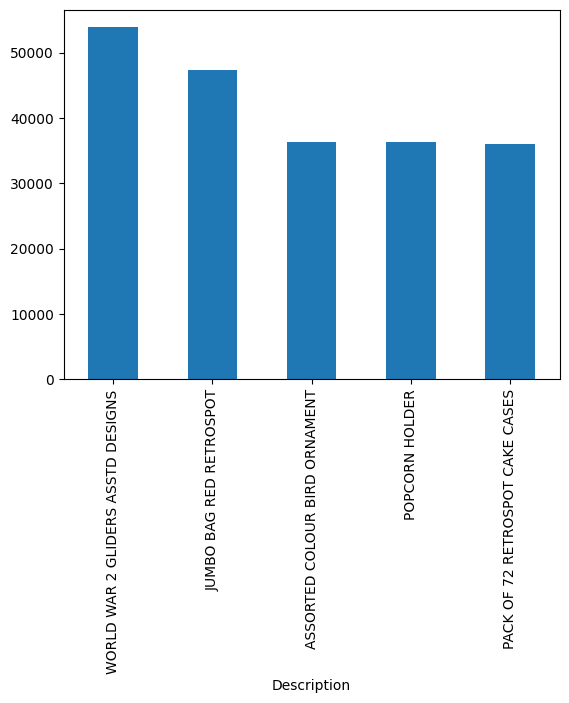

In [9]:
# Agrupar el dataset por la columna "Description" y cuenta la frecuencia de cada producto.
grouped_data = data.groupby('Description')
product_counts = grouped_data['Description'].value_counts()

# Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.
data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5).plot(kind='bar')



## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.